In [2]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
#pd.pandas.set_option("display.max_rows",None)
#pd.pandas.set_option("display.max_columns",None)
from pathlib import Path
nlp = spacy.load("en_core_web_sm")

# Defining Keys To Extract Tweets

In [3]:
data=pd.read_csv("bitcoins.csv")

In [78]:
data=data.drop(["Unnamed: 0"],axis="columns")

In [79]:
data

,Tweet Text
0,Wait for the real market drop around November ...
1,"$QNT\n\nSUN, SEA &amp; QUANT! \n\nGIVEAWAY!\n\..."
2,Cool
3,Let's goooo!
4,Don't like the #Bitcoin price action?\n\nThen ...
...,...
129,#nft #nfts #sgb #xrpl #eth #flr #sol #blockcha...
130,"$QNT\n\nSUN, SEA &amp; QUANT! \n\nGIVEAWAY!\n\..."
131,1+1=2 is an established fact . If everything i...
132,"$QNT\n\nSUN, SEA &amp; QUANT! \n\nGIVEAWAY!\n\..."


# Filtering Tweets to remove Emoji's etc

In [80]:
from bs4 import BeautifulSoup
import unicodedata
import re
def clean_text(text):
    
    text=re.sub(r'@[A-Za-z0-9]+', '',text) # remove @ mentions
    text=re.sub(r'#', '',text)  #remove # symbols  
    #text=re.sub(r'#[A-Za-z0-9]+', '',text)  #
    text=re.sub(r'RT[\S]+', '',text) # Removing RT
    text=re.sub(r'\bRT\b',"",text).strip() # Remove RT
    
    text=re.sub(r'\bRT\b',"",text).strip()# Removing RT
    text=re.sub(r'https?:\/\/\S+', '',text)# Removes hyperlinks
    text=' '.join(text.split()) # remove spaces
    
    
    text=re.sub(r'\n','',text)
    text=re.sub(r'__','',text)
    text=re.sub(r'_','',text)
   
    text=re.sub(r'|','',text)
    text=re.sub(r'[^\w ]+',"",text)
    text= re.sub(r'\d+', '', text) # remove numbers
    text = text.encode("ascii", "ignore").decode() #remove emojis
    
    text=re.sub(r'([A-Za-z0-9+._-]+@[A-Za-z0-9+._-]+\.[A-Za-z0-9+_-]+)',"",text) # remove Emails
    text=BeautifulSoup(text, 'lxml').get_text().strip()  #Remove HTML TAGS
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8','ignore')  #remove accented characters
    text=re.sub(r'[^\w ]+',"",text)  # Remove Special Characters ...,,,@\\
    
    text=' '.join(text.split()) #Removing Extra Spaces and Gapes
    
    
    return text

In [81]:
data["Tweet Text"]=data["Tweet Text"].apply(clean_text)
data

,Tweet Text
0,Wait for the real market drop around November ...
1,QNT SUN SEA amp QUANT GIVEAWAY Caribbean One p...
2,Cool
3,Lets goooo
4,Dont like the Bitcoin price action Then stop w...
...,...
129,nft nfts sgb xrpl eth flr sol blockchain crypt...
130,QNT SUN SEA amp QUANT GIVEAWAY Caribbean One p...
131,is an established fact If everything in the cr...
132,QNT SUN SEA amp QUANT GIVEAWAY Caribbean One p...


# REMOVING STOPWORDS 

In [82]:
data["Tweet Text"]=data["Tweet Text"].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords]))

# Convert words into its Root Form

In [83]:
import en_core_web_sm

nlp=spacy.load("en_core_web_sm")

def base_conversion(x):
    x=str(x)
    x_list=[]
    doc=nlp(x)
    
    for token in doc:
        lemma=token.lemma_
        if(lemma=='-PRON-' or lemma== 'be'):
            lemma=token.text
        x_list.append(lemma)
    return ' '.join(x_list)

In [84]:
data["Tweet Text"]=data["Tweet Text"].apply(lambda x: base_conversion(x))

# 100 Common Words Removal (Most frequent words Removal)

In [19]:
text=' '.join(data["Tweet Text"])
text=text.split()

# finding frequency of words repeated the most

freq_common=pd.Series(text).value_counts()
# selecting top 20 words that are the most commonly occured in the dataset
f20=freq_common[:100]

data["Tweet Text"]=data["Tweet Text"].apply(lambda x: ' '.join([i for i in x.split() if i not in f20 ]))

# Rare Occuring Words Removal

In [20]:
text=' '.join(data["Tweet Text"])
text=text.split()

freq_common=pd.Series(text).value_counts()
# selecting top 20 words that are the most commonly occured in the dataset
rare20=freq_common.tail(20)

data["Tweet Text"]=data["Tweet Text"].apply(lambda x: ' '.join([i for i in x.split() if i not in rare20 ]))

# Tweets Tokenized into words

In [85]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('\\W+',text)
    return tokens
#applying function to the column
data['Tokenized_tweets']= data['Tweet Text'].apply(lambda x: tokenization(x))

In [86]:
data

,Tweet Text,Tokenized_tweets
0,wait real market drop November January,"[wait, real, market, drop, November, January]"
1,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea..."
2,cool,[cool]
3,let goooo,"[let, goooo]"
4,do not like Bitcoin price action then stop whi...,"[do, not, like, Bitcoin, price, action, then, ..."
...,...,...
129,nft nfts sgb xrpl eth flr sol blockchain crypt...,"[nft, nfts, sgb, xrpl, eth, flr, sol, blockcha..."
130,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea..."
131,establish fact if crypto world board include,"[establish, fact, if, crypto, world, board, in..."
132,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea..."


# Polarity and Subjectivity of Tweets

In [87]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_Polarity(text):
    return TextBlob(text).sentiment.polarity

data["Subjectivity"]=data["Tweet Text"].apply(get_subjectivity)
data["Polarity"]=data["Tweet Text"].apply(get_Polarity)

In [88]:
data

,Tweet Text,Tokenized_tweets,Subjectivity,Polarity
0,wait real market drop November January,"[wait, real, market, drop, November, January]",0.300000,0.20
1,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea...",0.250000,0.55
2,cool,[cool],0.650000,0.35
3,let goooo,"[let, goooo]",0.000000,0.00
4,do not like Bitcoin price action then stop whi...,"[do, not, like, Bitcoin, price, action, then, ...",0.085417,0.00
...,...,...,...,...
129,nft nfts sgb xrpl eth flr sol blockchain crypt...,"[nft, nfts, sgb, xrpl, eth, flr, sol, blockcha...",0.000000,0.00
130,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea...",0.250000,0.55
131,establish fact if crypto world board include,"[establish, fact, if, crypto, world, board, in...",0.000000,0.00
132,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea...",0.250000,0.55


# Analyzing Tweets Negative or Positive or Neutral

In [89]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data["Analysis"]=data["Polarity"].apply(getAnalysis)

# Counting Neutral or Positive or Negative Tweets

In [90]:
data["Analysis"].value_counts()

Positive    78
Neutral     50
Negative     6
Name: Analysis, dtype: int64

In [91]:
data

,Tweet Text,Tokenized_tweets,Subjectivity,Polarity,Analysis
0,wait real market drop November January,"[wait, real, market, drop, November, January]",0.300000,0.20,Positive
1,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea...",0.250000,0.55,Positive
2,cool,[cool],0.650000,0.35,Positive
3,let goooo,"[let, goooo]",0.000000,0.00,Neutral
4,do not like Bitcoin price action then stop whi...,"[do, not, like, Bitcoin, price, action, then, ...",0.085417,0.00,Neutral
...,...,...,...,...,...
129,nft nfts sgb xrpl eth flr sol blockchain crypt...,"[nft, nfts, sgb, xrpl, eth, flr, sol, blockcha...",0.000000,0.00,Neutral
130,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea...",0.250000,0.55,Positive
131,establish fact if crypto world board include,"[establish, fact, if, crypto, world, board, in...",0.000000,0.00,Neutral
132,QNT SUN SEA amp QUANT GIVEAWAY Caribbean one p...,"[QNT, SUN, SEA, amp, QUANT, GIVEAWAY, Caribbea...",0.250000,0.55,Positive


# Visualizing Tweets 

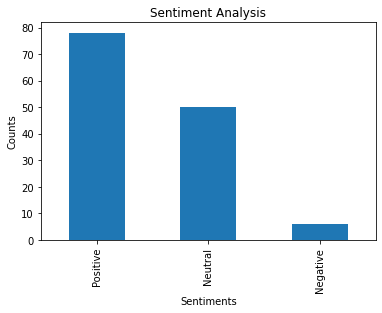

In [92]:
import matplotlib.pyplot as plt
ptweets=data[data.Analysis=='Positive']
ptweets=ptweets['Tweet Text']
round((ptweets.shape[0]/data.shape[0])*100,1)
## get percentage of negative tweets
ntweets=data[data.Analysis=='Negative']
round((ntweets.shape[0]/data.shape[0])*100,1)
## show value counts
data['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Words Cloud Visualization

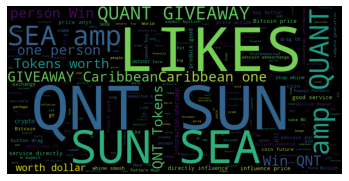

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text=' '.join(data["Tweet Text"])
len(text)

wc=WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

# Feature Engineering

In [94]:

x1=data["Tweet Text"]
y=data["Analysis"]


# Vectorizing Text to Vectors

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(x1)

features_names=vectorizer.get_feature_names()

In [96]:
len(features_names)

305

+ Converting Vectorized Data to Array because Model doesn't Understands Sparse Matrix Data generated from TFID Vectorizer

In [97]:
x=x.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
x.shape


(134, 305)

In [99]:
data2 = pd.DataFrame(data=x,columns=features_names)
x=data2
x

,able,accurate,action,ad,add,adress,ads,adscoin,adsexchange,after,...,worlds,worry,worth,xrp,xrpl,yeah,yeess,yesterday,you,zoom
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.237907,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.281416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.263621,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.237907,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.237907,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# Smote method to Balance data

In [100]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [101]:
y.value_counts()

Positive    78
Neutral     78
Negative    78
Name: Analysis, dtype: int64

# Splitting Data into Train and Test

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,train_size=0.80)


In [103]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [104]:
x_train.shape

(187, 305)

# Constant Features Removal

In [105]:
const_filter=VarianceThreshold(threshold=0)
const_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [106]:
# After removing of constant features from training set
const_filter.get_support().sum()

302

In [107]:
#columns that were constants

constant_features=[not temp for temp in const_filter.get_support()]

len(x.columns[constant_features])

3

In [108]:
# remove all constant features from dataset

x_train_filtered=const_filter.transform(x_train)
x_test_filtered=const_filter.transform(x_test)
x_train_filtered.shape


(187, 302)

In [109]:
# Comparing
x_train_filtered.shape,x_train.shape

((187, 302), (187, 305))

# Removing Duplicates Features

In [110]:
x_train_dupl=x_train_filtered.T
x_test_dupl=x_test_filtered.T

In [111]:
type(x_train_dupl)

numpy.ndarray

In [112]:
x_train_dupl=pd.DataFrame(x_train_dupl)
x_test_dupl=pd.DataFrame(x_test_dupl)

In [113]:
#Duplicated Features
duplicate_features=x_train_dupl.duplicated()
duplicate_features

0      False
1      False
2      False
3      False
4      False
       ...  
297     True
298    False
299     True
300    False
301     True
Length: 302, dtype: bool

In [114]:
#Features not Duplicated

features_to_keep=[not index for index in duplicate_features]

In [115]:
x_train_final=x_train_dupl[features_to_keep].T
x_test_final=x_test_dupl[features_to_keep].T

In [116]:
x_train_final.shape

(187, 99)

In [117]:
x_test_final.shape

(47, 99)

# Cleaned data for training and Testing

In [118]:
x_train_final.shape,x_test_final.shape

((187, 99), (47, 99))

# Gradient Boosting Classifier

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
model2=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=16, random_state=15)
model2.fit(x_train_final, y_train)
model2.score(x_test_final, y_test)

0.9361702127659575

# Classification Report

In [120]:
predictions=model2.predict(x_test_final)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        23
     Neutral       0.92      0.85      0.88        13
    Positive       0.83      0.91      0.87        11

    accuracy                           0.94        47
   macro avg       0.92      0.92      0.92        47
weighted avg       0.94      0.94      0.94        47



# Multinomial Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model=MultinomialNB()
model.fit(x_train_final,y_train)
model.score(x_test_final,y_test)

0.9361702127659575

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        23
     Neutral       0.92      0.85      0.88        13
    Positive       0.83      0.91      0.87        11

    accuracy                           0.94        47
   macro avg       0.92      0.92      0.92        47
weighted avg       0.94      0.94      0.94        47



In [124]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model=GaussianNB()
model.fit(x_train_final,y_train)
model.score(x_test_final,y_test)

0.9361702127659575

In [125]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model=BernoulliNB()
model.fit(x_train_final,y_train)
model.score(x_test_final,y_test)

0.9787234042553191

In [126]:
predictions=model.predict(x_test_final)

In [127]:

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        23
     Neutral       0.93      1.00      0.96        13
    Positive       1.00      0.91      0.95        11

    accuracy                           0.98        47
   macro avg       0.98      0.97      0.97        47
weighted avg       0.98      0.98      0.98        47



In [128]:

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        23
     Neutral       0.93      1.00      0.96        13
    Positive       1.00      0.91      0.95        11

    accuracy                           0.98        47
   macro avg       0.98      0.97      0.97        47
weighted avg       0.98      0.98      0.98        47



In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier


In [130]:
# list of models
models = [MultinomialNB(), GaussianNB(), BernoulliNB(), GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=13, random_state=1)]

In [131]:
def compare_models_cross_validation():
    
    for model in models:
        cv_score = cross_val_score(model, x, y, cv=4)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
        print('Cross Validation accuracies for the',model,'=', cv_score)
        print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
        print('---------------------------------------------------------------')

In [132]:
compare_models_cross_validation()

Cross Validation accuracies for the MultinomialNB() = [0.86440678 0.91525424 0.94827586 0.93103448]
Acccuracy score of the  MultinomialNB() = 91.47 %
---------------------------------------------------------------
Cross Validation accuracies for the GaussianNB() = [0.79661017 0.94915254 0.94827586 0.96551724]
Acccuracy score of the  GaussianNB() = 91.49 %
---------------------------------------------------------------
Cross Validation accuracies for the BernoulliNB() = [0.86440678 0.84745763 0.94827586 0.86206897]
Acccuracy score of the  BernoulliNB() = 88.06 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingClassifier(learning_rate=1.0, max_depth=13, random_state=1) = [0.84745763 0.94915254 0.94827586 0.93103448]
Acccuracy score of the  GradientBoostingClassifier(learning_rate=1.0, max_depth=13, random_state=1) = 91.9 %
---------------------------------------------------------------


In [135]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_final,y_train)
model.score(x_test_final,y_test)

0.9787234042553191

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        23
     Neutral       0.93      1.00      0.96        13
    Positive       1.00      0.91      0.95        11

    accuracy                           0.98        47
   macro avg       0.98      0.97      0.97        47
weighted avg       0.98      0.98      0.98        47

